## Problem 0: Path follower implementation
In `chap10.path_follower.py` implement the following two functions
* `follow_straight_line(...)`
* `follow_orbit(...)`

A few notes on implementation:
* Ensure to populate the entire autopilot command for each function
* Use the `wrap(...)` function as appropriate
* Only return a non-zero roll feed forward term for the circular orbit when $\frac{d-\rho}{\rho} < 10$
* Calculate the roll feed forward term assuming no wind

In [1]:
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap10.run_sim import run_sim
from mav_sim.message_types.msg_path import MsgPath
from mav_sim.message_types.msg_state import MsgState
from mav_sim.message_types.msg_sim_params import MsgSimParams
from typing import Callable

from mav_sim.chap10.path_viewer import PathViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.tools.display_figures import display_data_view, display_mav_view

# The viewers need to be initialized once due to restart issues with qtgraph
if 'path_view' not in globals():
    print("Initializing mav_view")
    global path_view
    path_view = PathViewer()  # initialize the mav viewer
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()  # initialize view of data plots

# Initialize the simulation parameters
sim_params_default = MsgSimParams(end_time=50., video_name="cha10.avi") # Sim ending in 10 seconds
state = DynamicState()

# Function for running simulation and displaying results
def run_sim_and_display(path_fnc: Callable[ [float, MsgState], MsgPath], sim_params: MsgSimParams = sim_params_default):
    global path_view
    global data_view
    data_view.reset(sim_params.start_time)
    (path_view, data_view) = run_sim(sim=sim_params, path_fnc=path_fnc, init_state=state, path_view=path_view, data_view=data_view) 
    display_data_view(data_view)
    display_mav_view(path_view)

Initializing mav_view
Initializing data_view


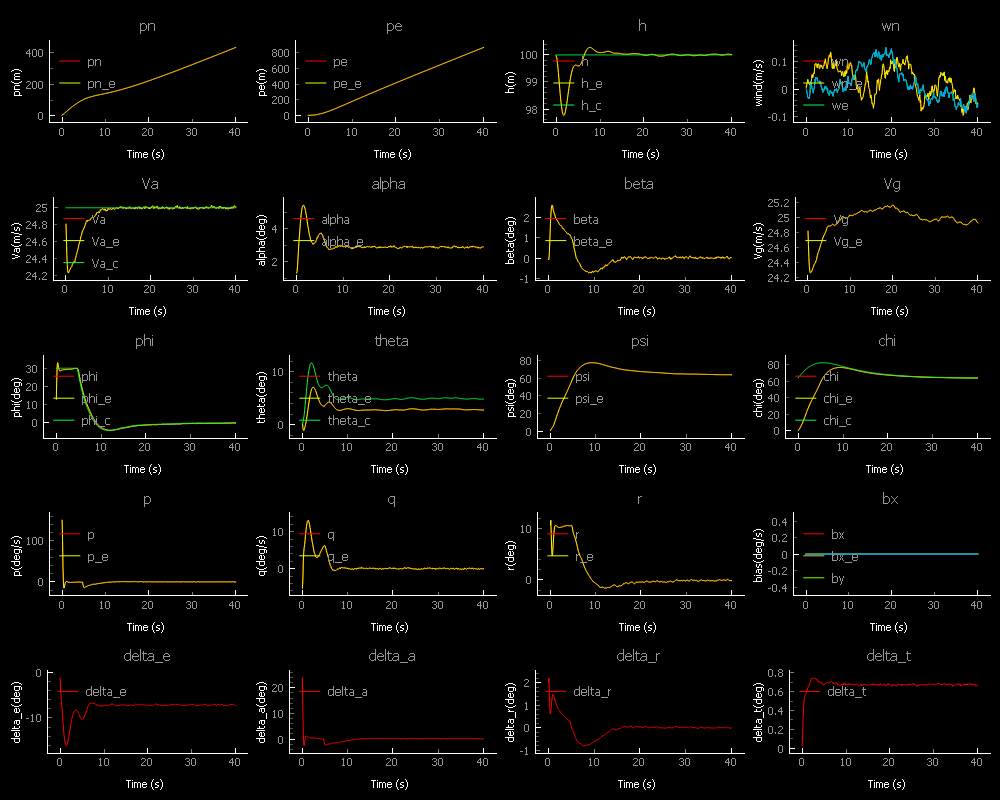

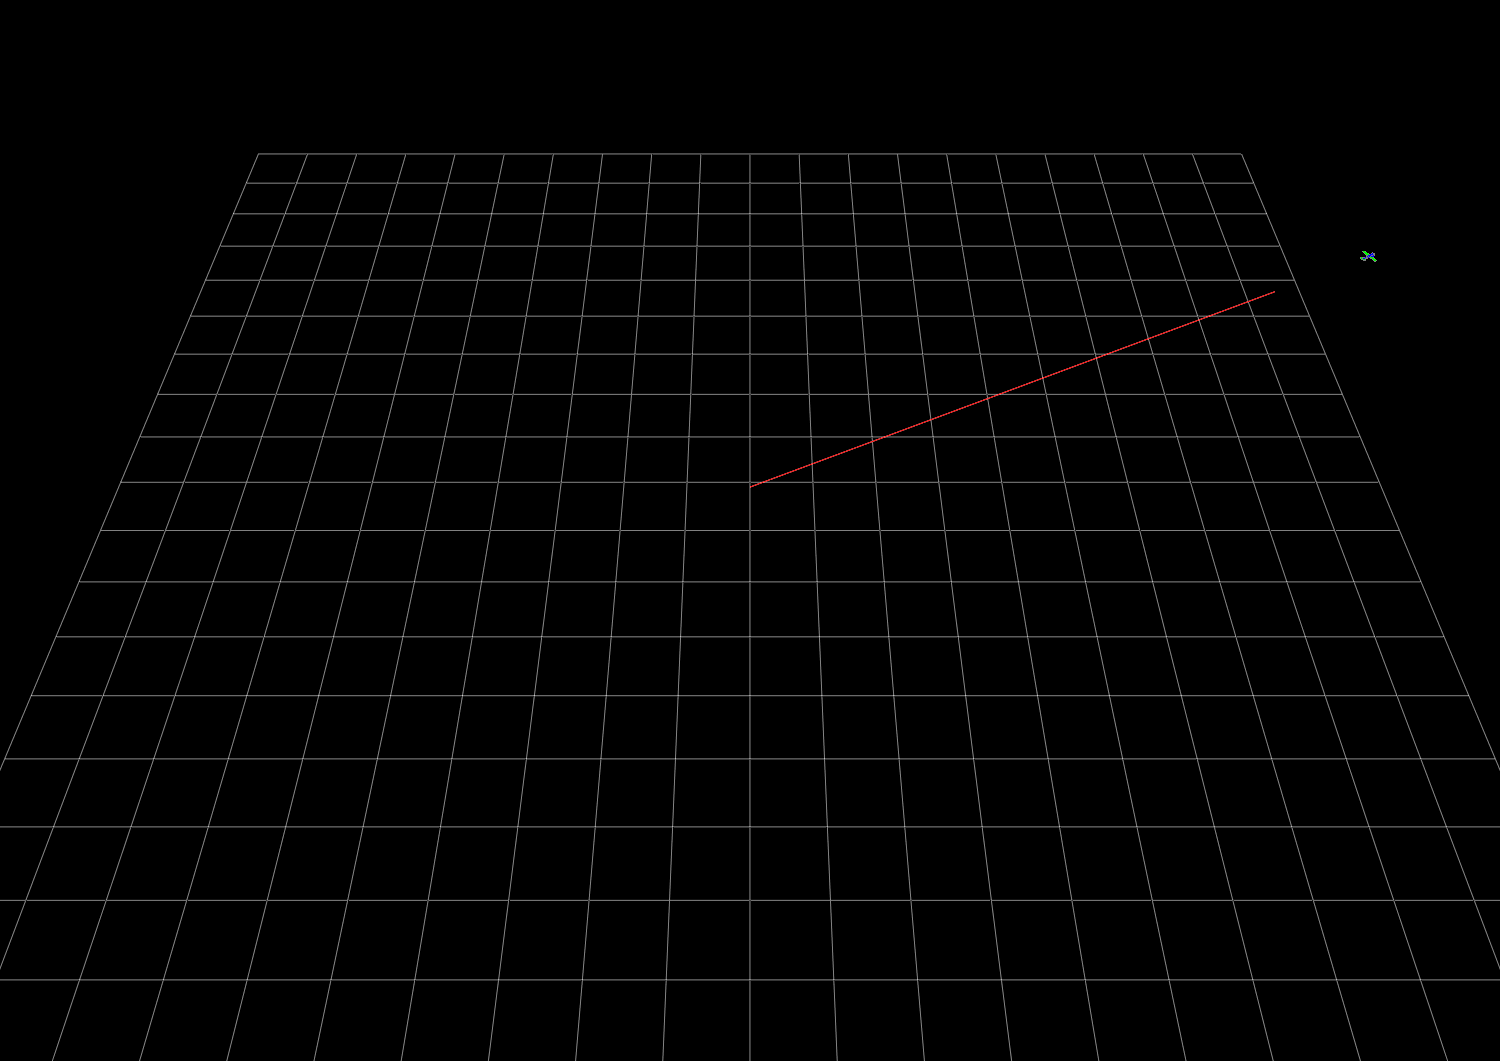

In [2]:
# path definition
path = MsgPath()
path.type = "line"
path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 1: Achievable Line Defined Between Points
Control the aircraft to follow a straight line path at 20 m/s where the line is defined by the points $w_0^i = \begin{bmatrix}0 \\ 2 \\ -100 \end{bmatrix}$ and $w_1^i = \begin{bmatrix}50 \\ 10 \\ -100 \end{bmatrix}$

### Describe the results
The aircraft follows the path. Athought there apears to be some kind of mode causing the aircraft to pitch up and down at the desiered altitude this could be a short period mode. This mode can be corrected by doing a dynamical analysis on the aircraft and fixing the physical aircraft or by tuning the controller. 

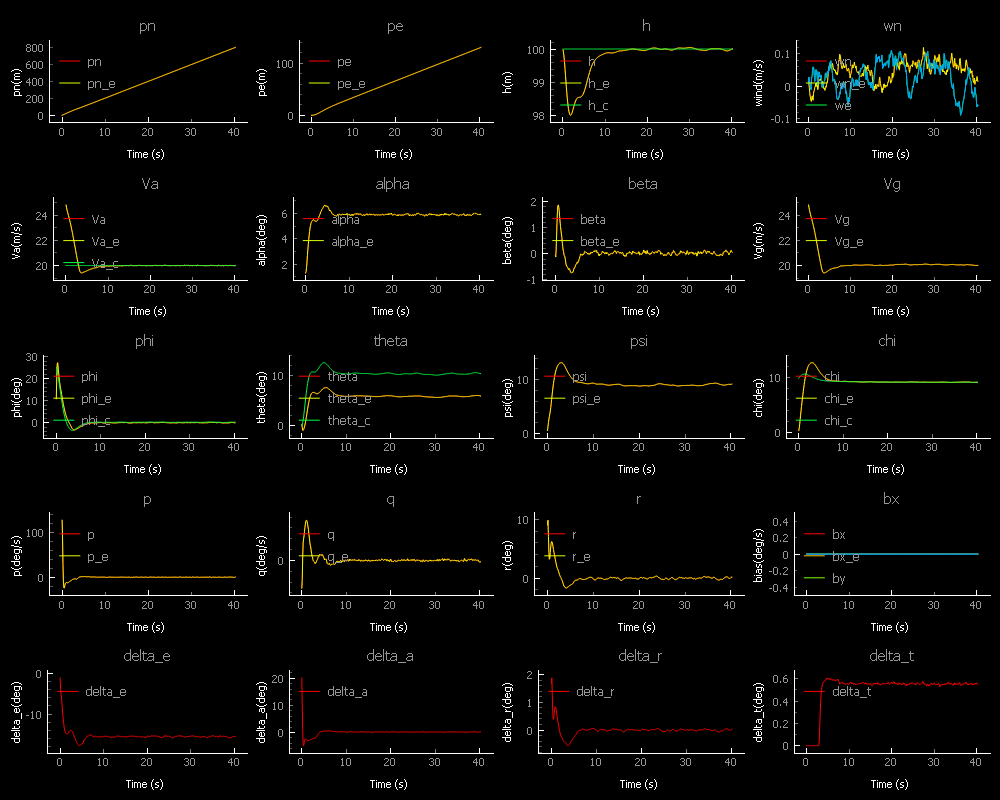

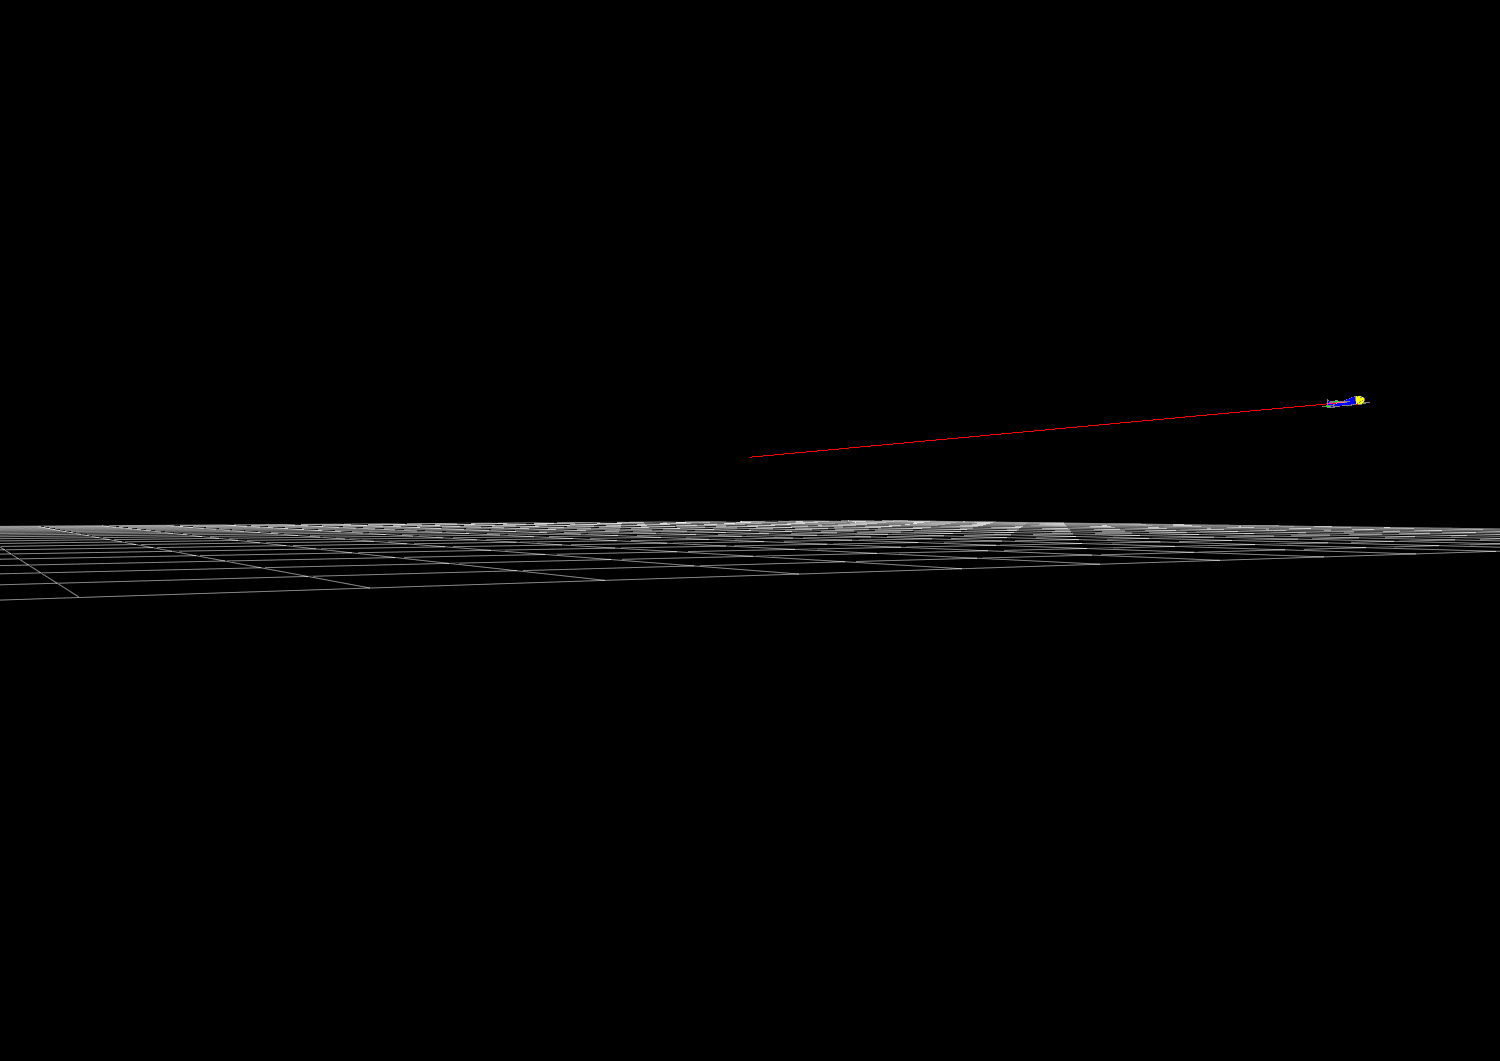

In [3]:
path = MsgPath()
path.type = "line"
path.line_origin = np.array([[0.0, 2.0, -100.0]]).T
path.line_direction = np.array([[50.0,8.0,0.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
path.airspeed=20.0
# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 2: Near-Achievable Line Defined Between Points
Control the aircraft to follow a straight line path at 30 m/s where the line is defined by the points $w_0^i = \begin{bmatrix}0 \\ 2 \\ -100 \end{bmatrix}$ and $w_1^i = \begin{bmatrix}100 \\ 200 \\ -150 \end{bmatrix}$

### Describe the results
The aircraft starts off the line and then aproches the line and continues to follow the line. This is due to the aircraft not starting in the same place a the line so the aircraft approches the line asymtoticly. 

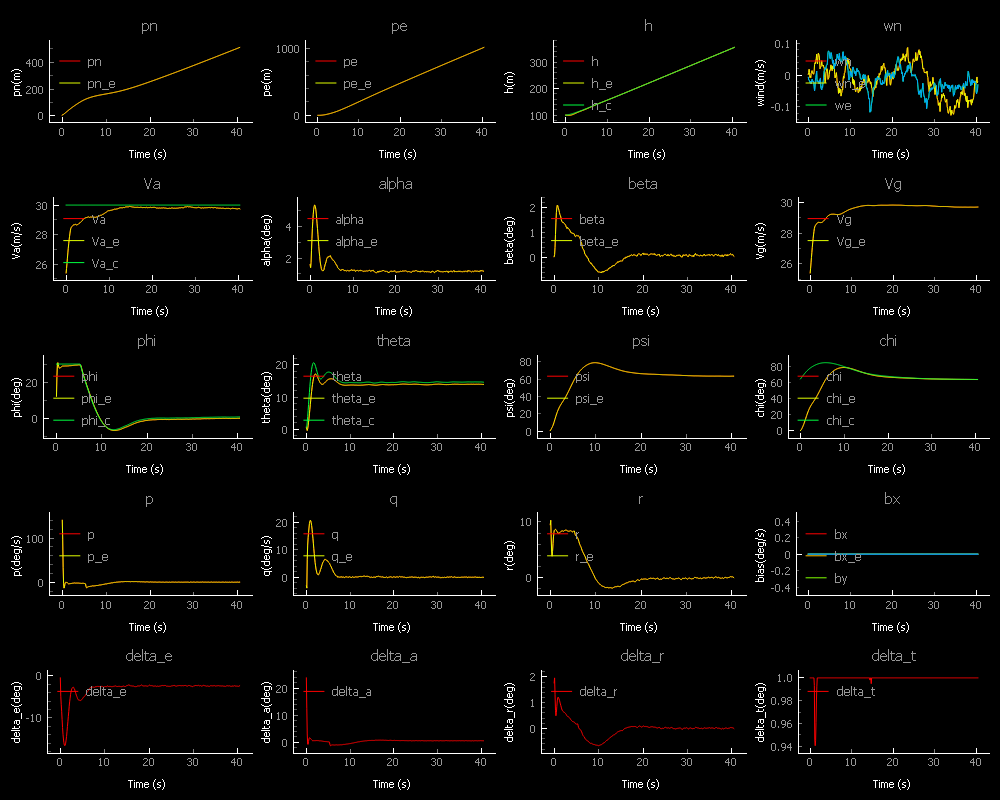

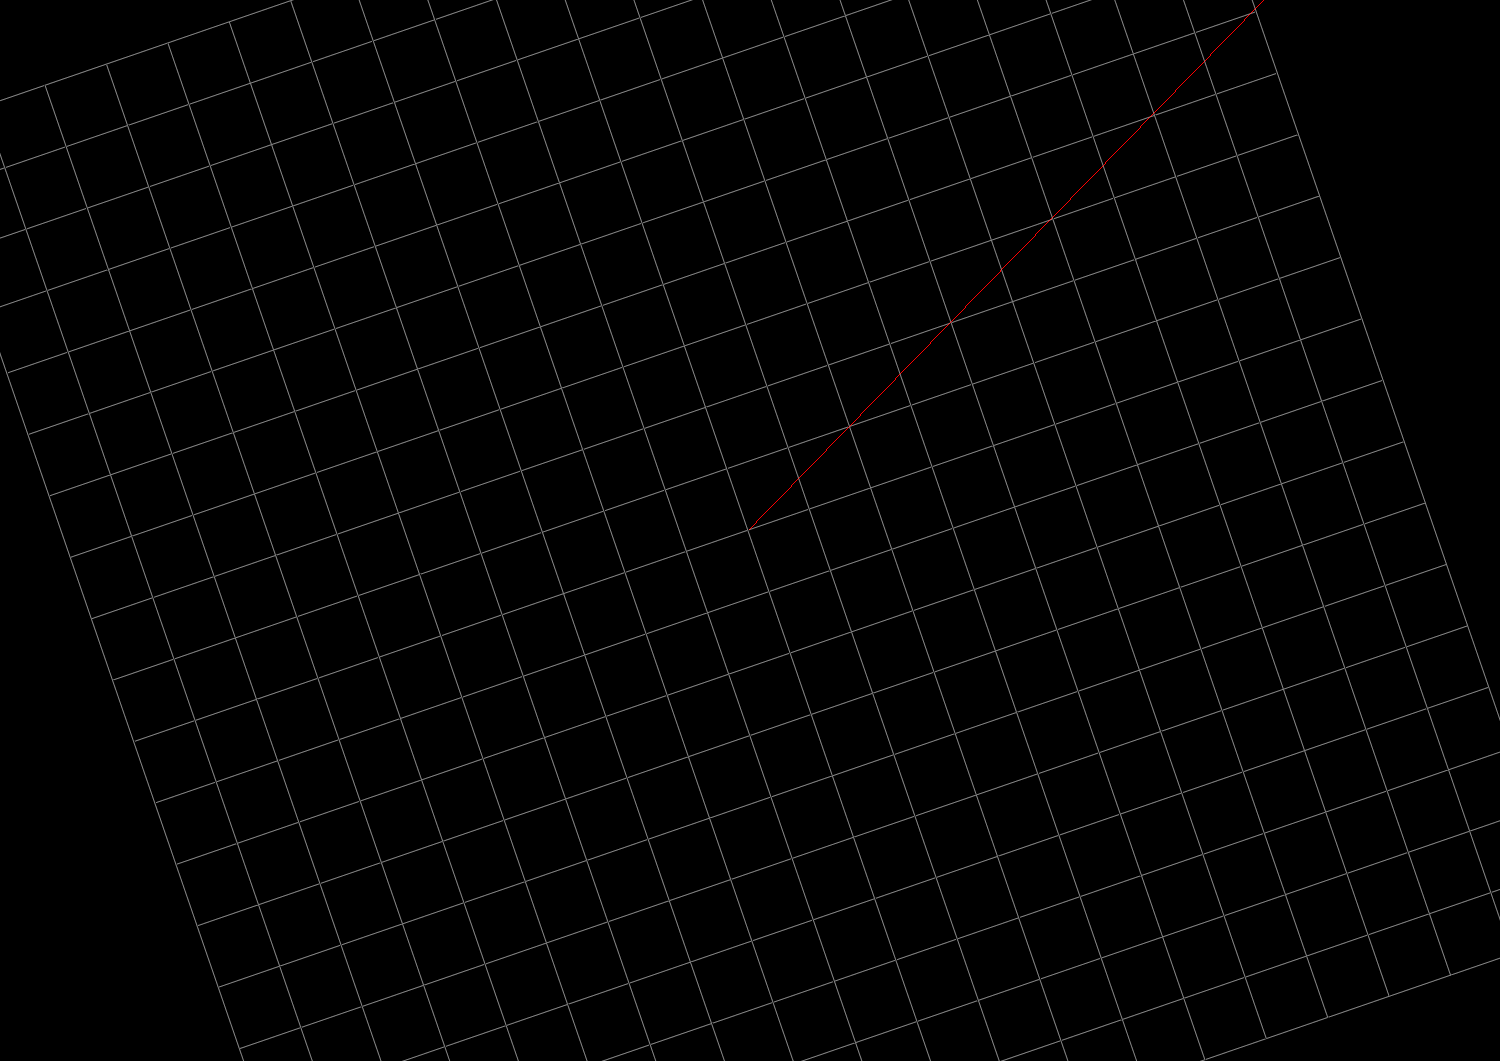

In [4]:
path = MsgPath()
path.type = "line"
path.line_origin = np.array([[0.0, 2.0, -100.0]]).T
path.line_direction = np.array([[100.0,198.0,-50.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
path.airspeed=30.0
# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 3: Non-Achievable Line Defined Between Points
Control the aircraft to follow a straight line path at 30 m/s where the line is defined by the points $w_0^i = \begin{bmatrix}0 \\ 2 \\ -100 \end{bmatrix}$ and $w_1^i = \begin{bmatrix}100 \\ 200 \\ -200 \end{bmatrix}$

### Describe the results
The aircraft seems to be tracking lateraly. However, the aircraft never reaches the line vertically. 

### What do you notice about the z-component of the line direction definition and the ability to track the line?
The aircraft never reaches the line verticaly. It will run parallel to the line but it never quite reaches the line exactly. To correct this you could increase the airspeed giving you more elevator athority. Or you could increase the maximum elevator difflection. If the second is done you just need to be careful not to stall the aircraft due to a large angle of attack. 

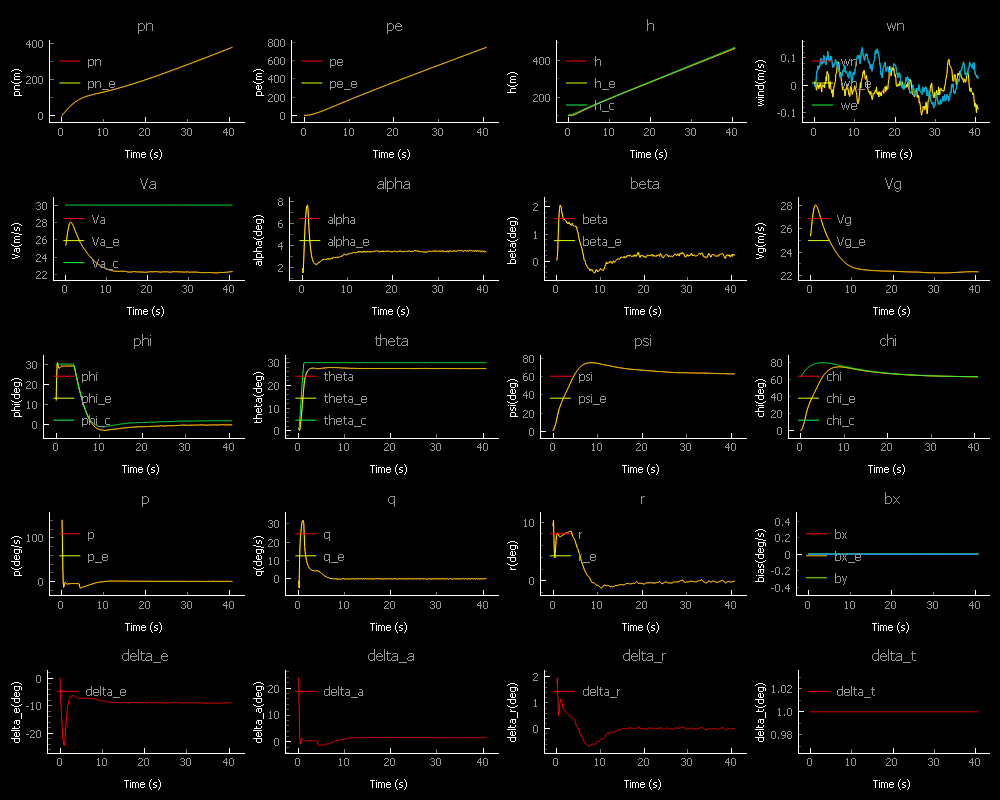

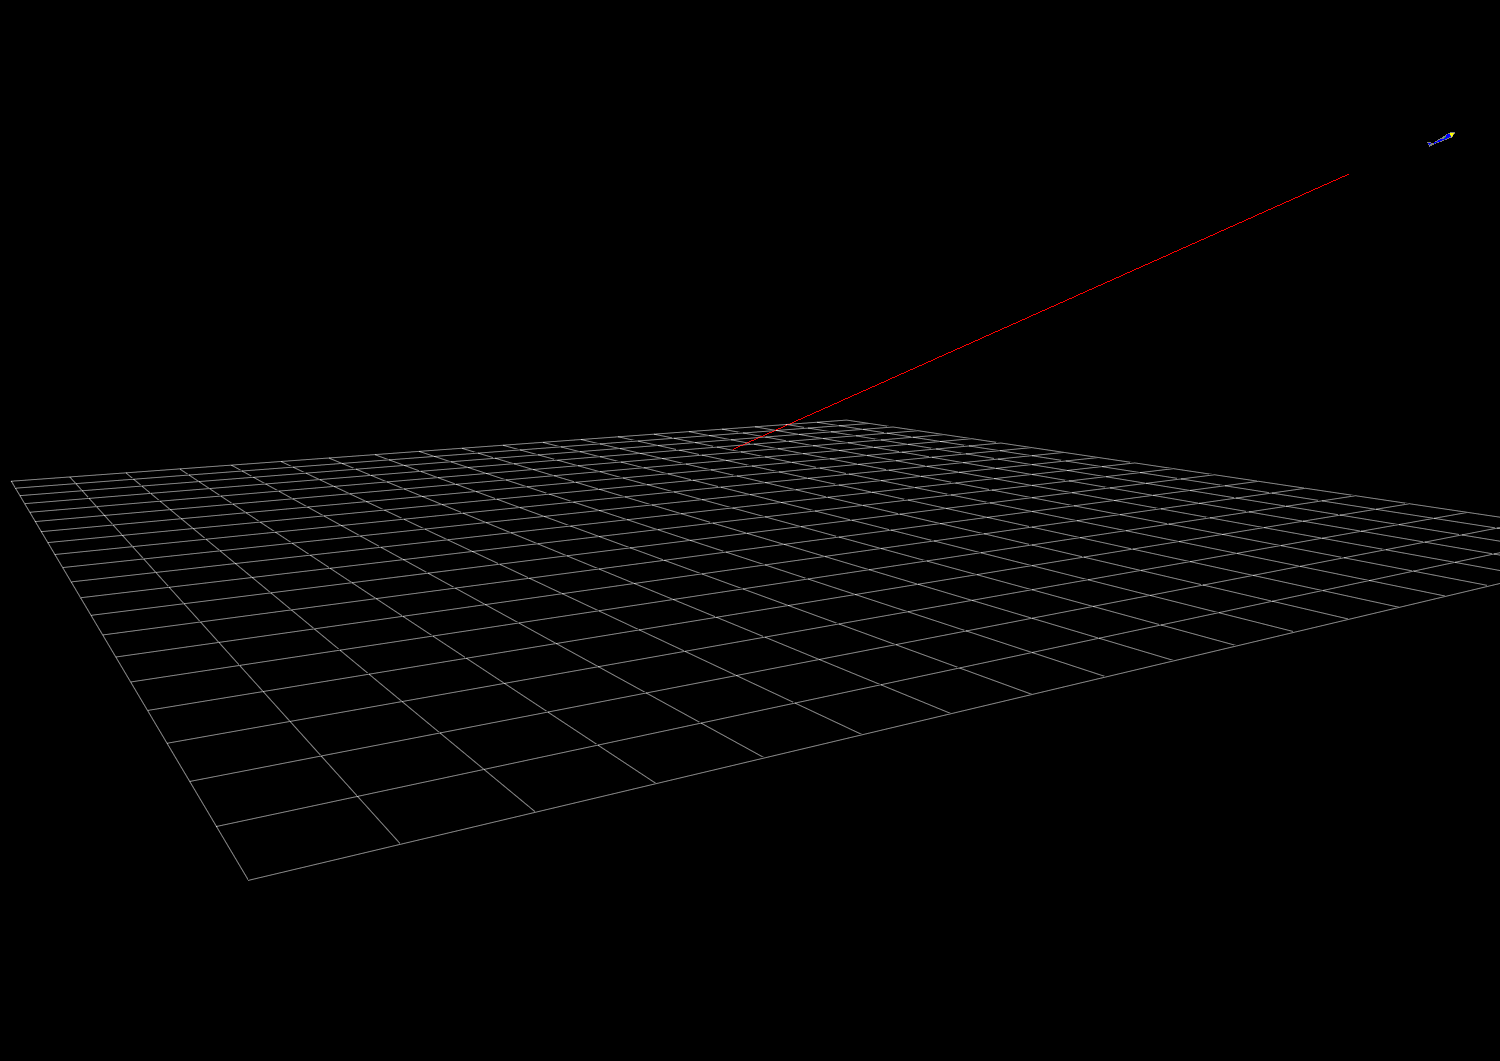

In [5]:
path = MsgPath()
path.type = "line"
path.line_origin = np.array([[0.0, 2.0, -100.0]]).T
path.line_direction = np.array([[100.0,198.0,-100.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
path.airspeed=30.0
# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 4: Trackable Orbit definition
Control the aircraft in a clockwise circular orbit around the point $w_0^i = \begin{bmatrix}400 \\ 200 \\ -100 \end{bmatrix}$ at a radius of 200 meters and airspeed of 25 m/s.

### Describe the results
The aircraft flys straight through the desired circle then turns around to get the correct direction of the orbit. The simulation ends before I can clearly see if the aircraft follows the orbit very closely but it appears to be tracking correctly. 



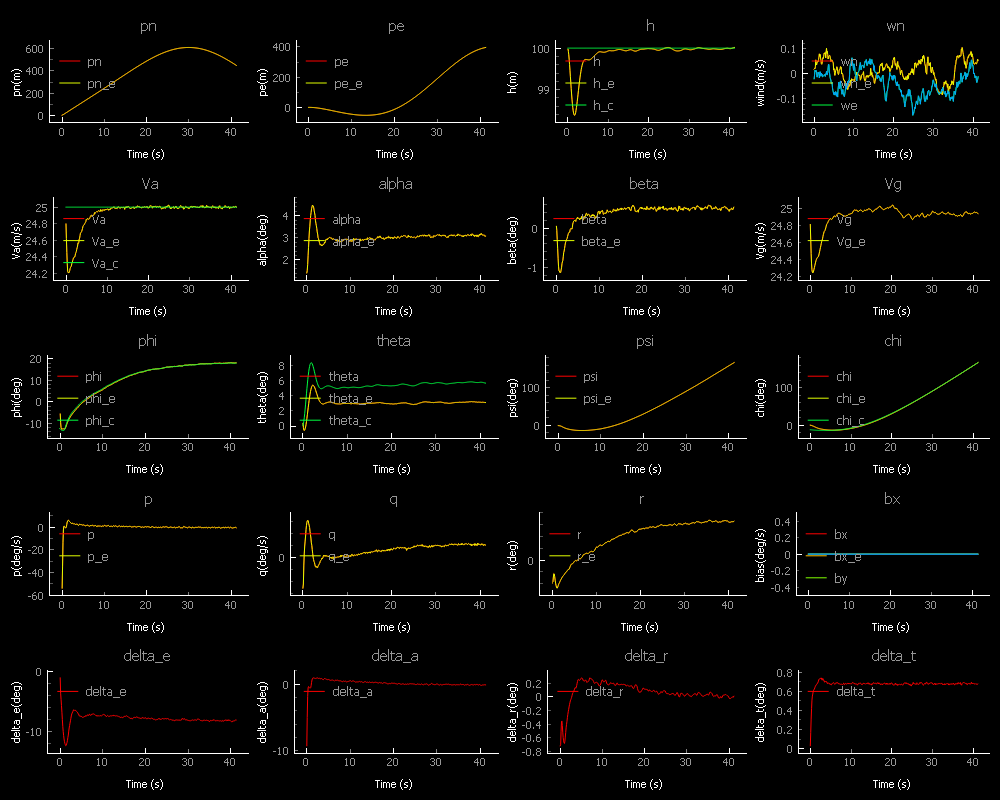

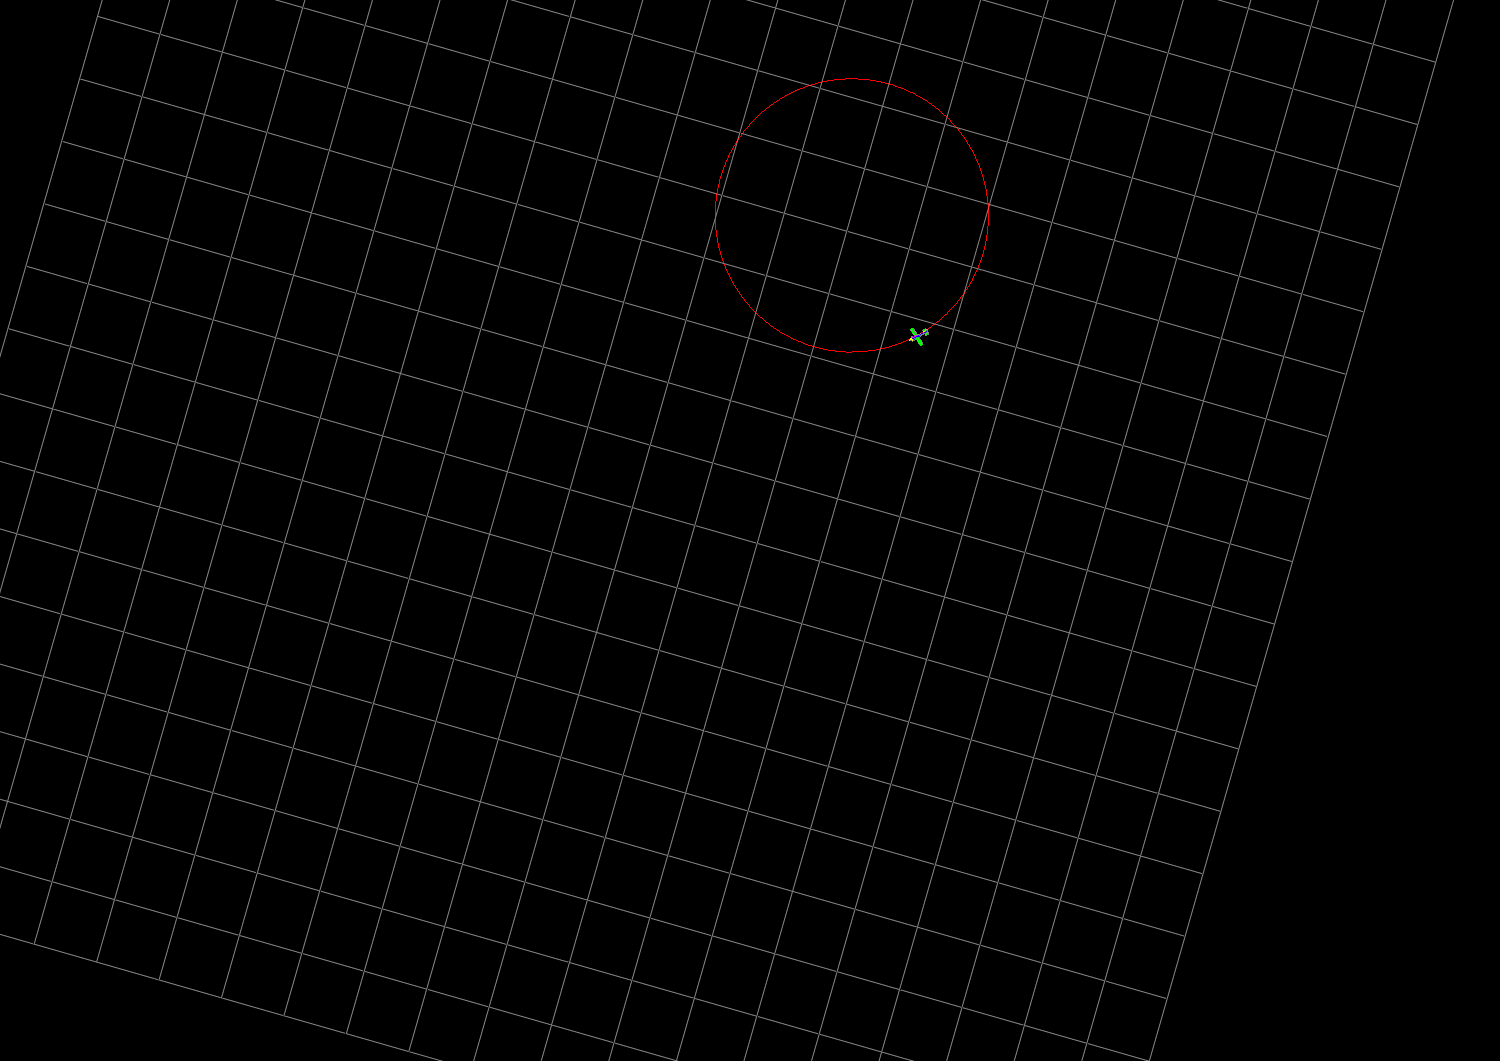

In [8]:
path = MsgPath()
path.type = "orbit"
path.orbit_center = np.array([[400.0, 200.0, -100.0]]).T
path.orbit_radius = 100.0
path.orbit_direction = "CW"
path.airspeed=25.0
# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 5: UnTrackable Orbit definition
Control the aircraft in a counter-clockwise circular orbit around the point $w_0^i = \begin{bmatrix}100 \\ -100 \\ -100 \end{bmatrix}$ at a radius of 75 meters and airspeed of 25 m/s.

### Describe the results
The aircraft aproches the orbit but never quite gets there. The aircraft seems to do an eliptical orbit around the desired path. 

### What do you notice about the radius and the ability to track the orbit?
The aircraft can't make that tight of a turn to meet the smaller orbit. It does perform an eliptical orbit around the desired path. To correct this I would decrease the airspeed or increase the ailloron deffelection. 

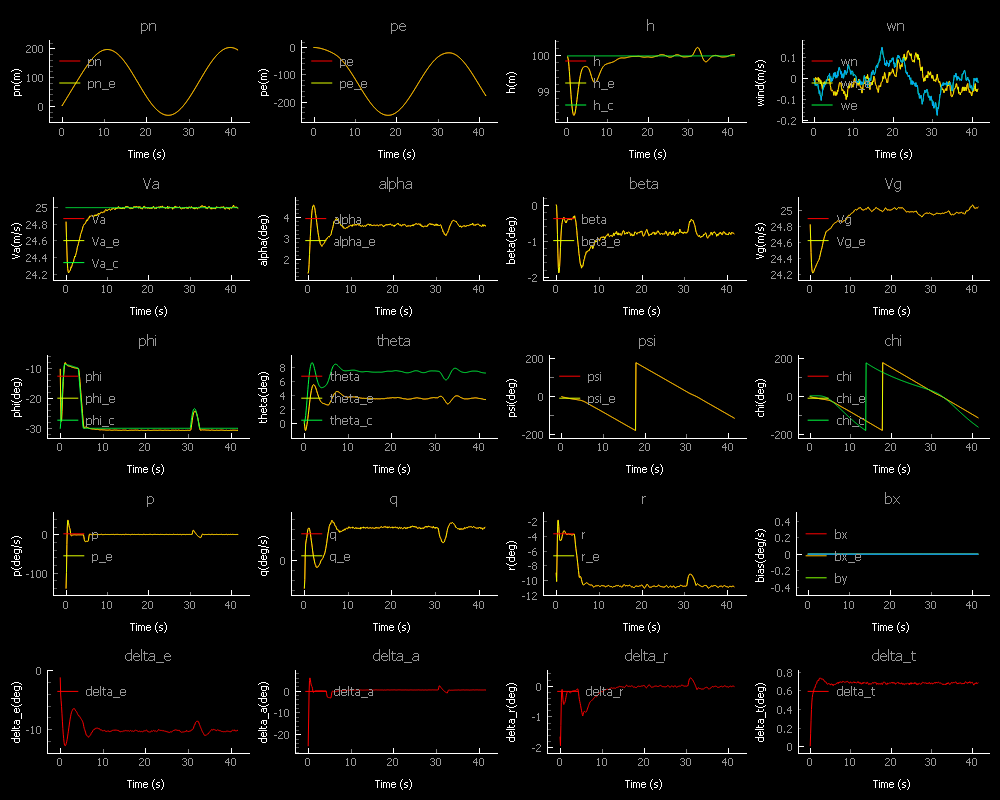

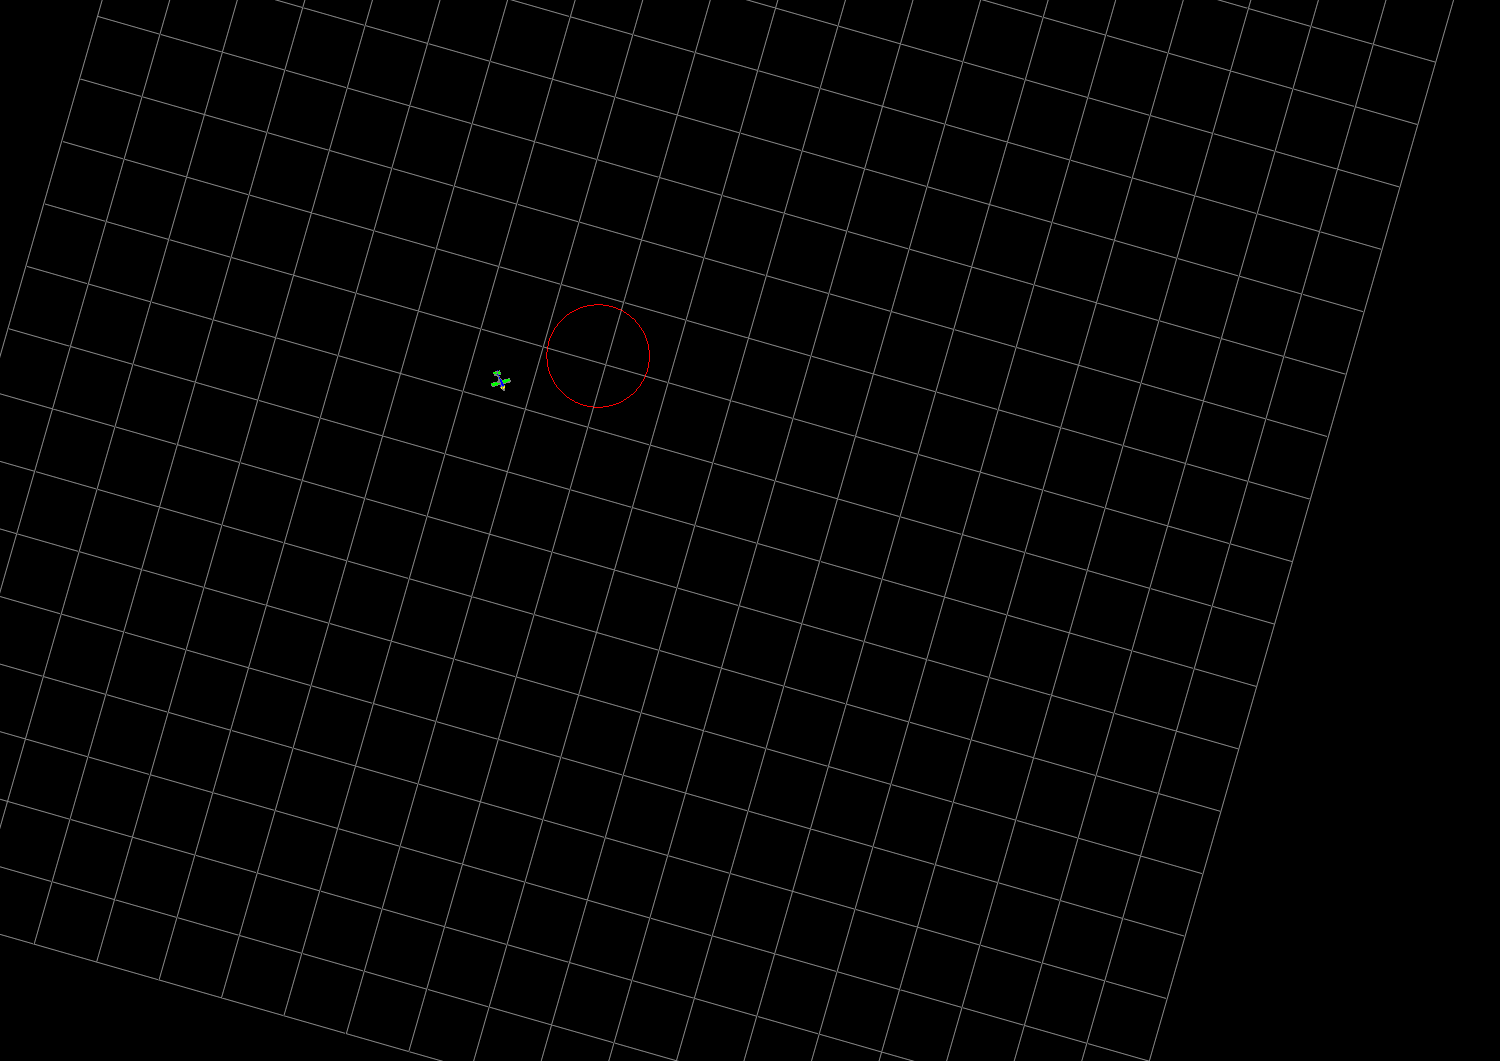

In [9]:
path = MsgPath()
path.type = "orbit"
path.orbit_center = np.array([[100.0, -100.0, -100.0]]).T
path.orbit_radius = 75.0
path.orbit_direction = "CCW"
path.airspeed=25.0
# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 6: Switching control with no transition
Control the aircraft at 25 m/s using straight-line paths to move between waypoints $w_0^i = \begin{bmatrix}0 \\ 0 \\ -100 \end{bmatrix}$, $w_1^i = \begin{bmatrix}600 \\ 0 \\ -100 \end{bmatrix}$, $w_2^i = \begin{bmatrix}600 \\ 1 \\ -100 \end{bmatrix}$. Switch from executing linesegment $\overline{w_0 w_1}$ to $\overline{w_1 w_2}$ when the aircraft's north position is greater than or equal to the north position of $w_1^i$.

### Describe the quality of the path following
The aircraft does eventually follow the path that it was given but it makes a large detor to get there. It would be better if the two line segements were connected by an orbit. 


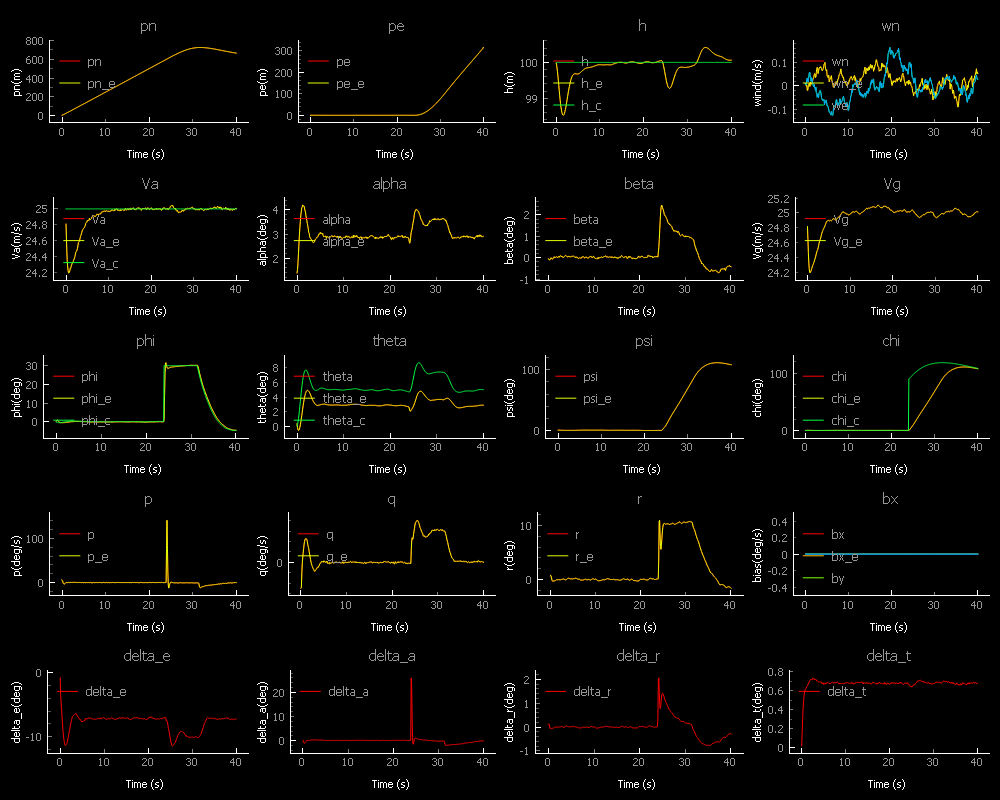

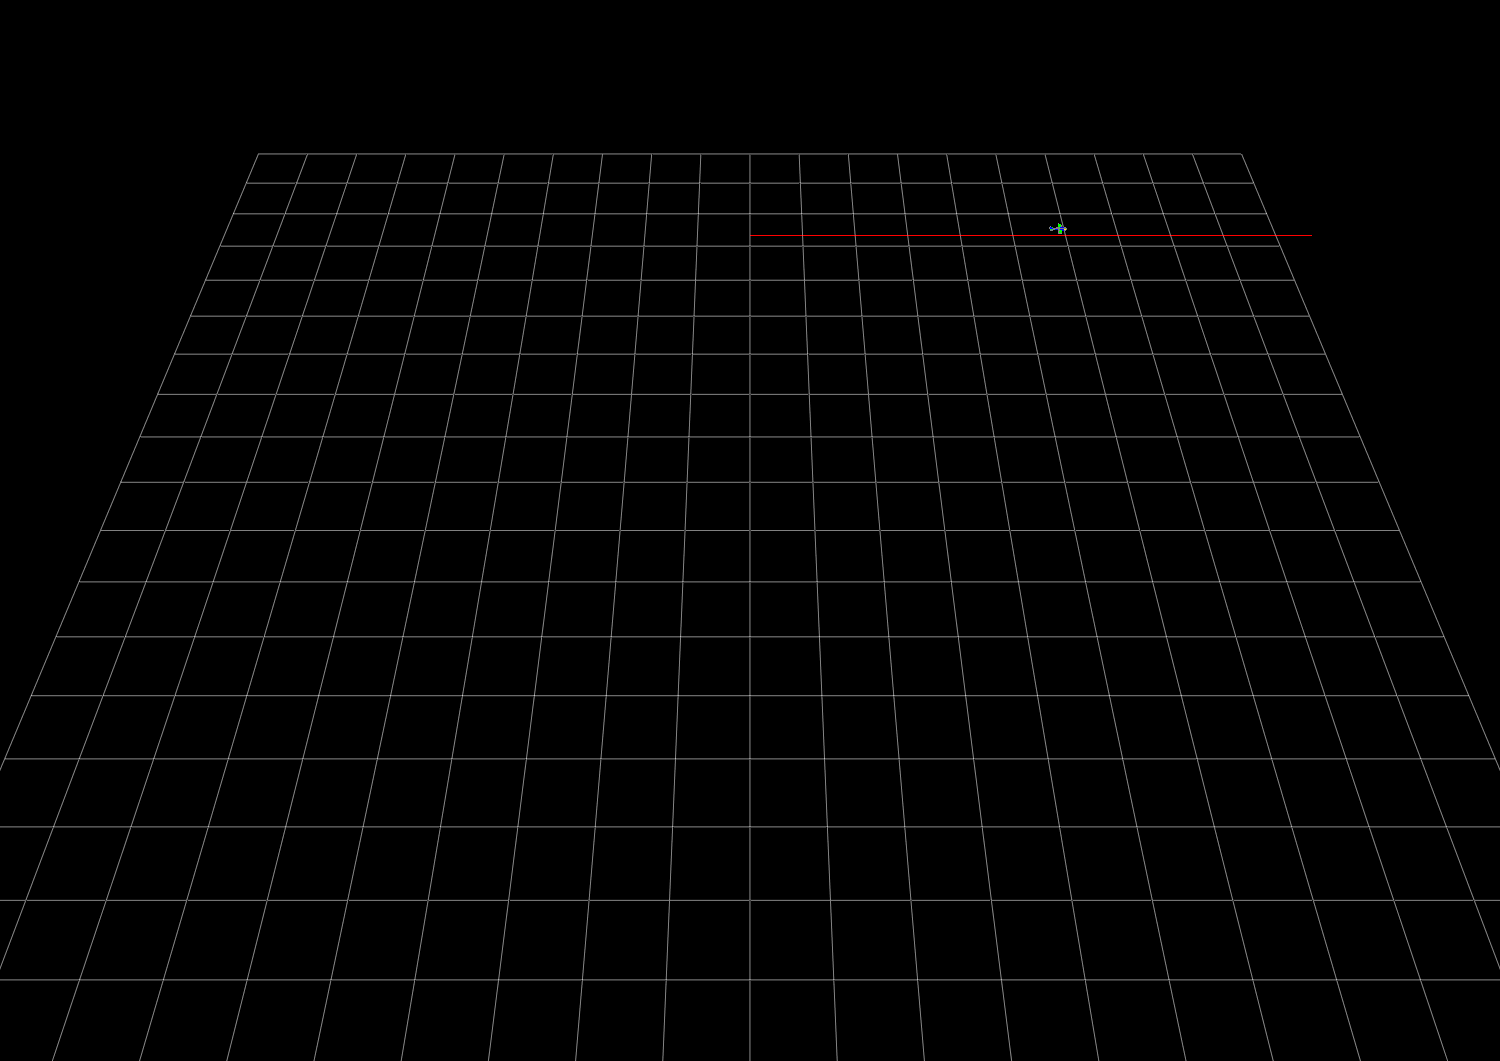

In [2]:

def constant_path(time: float, state: MsgState) -> MsgPath:
    path = MsgPath()
    path.type = "line"
    if state.north<600:
        path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
        path.line_direction = np.array([[600.0,0.0,0.0]]).T
    if state.north>=600:
        path.line_origin = np.array([[600.0, 0.0, -100.0]]).T
        path.line_direction = np.array([[0.0,1.0,0.0]]).T   
    path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
    path.airspeed=25.0
    
    return path
    # Constant path function definition

    


# Follow path
run_sim_and_display(path_fnc=constant_path)
    

## Problem 7: Switching control with arc transition
Repeat problem 6, but instead of having a hard switch between $\overline{w_0 w_1}$ and $\overline{w_1 w_2}$, you will use a circular arc of radius 150 m to perform the switch. Create a circular orbit such that it has exactly one tangent point on $\overline{w_0 w_1}$ and one on $\overline{w_1 w_2}$. Switch to the arc when the aircraft north state has reached the value of the tangent point. Switch from executing the arc to executing $\overline{w_1 w_2}$ when the aircraft east state has reached the value of the tangent point.

### Describe the quality of the path following
The path following is much better the transition between the two lines is smooth and the aircraft doesn't deviate from the paths it was given. 

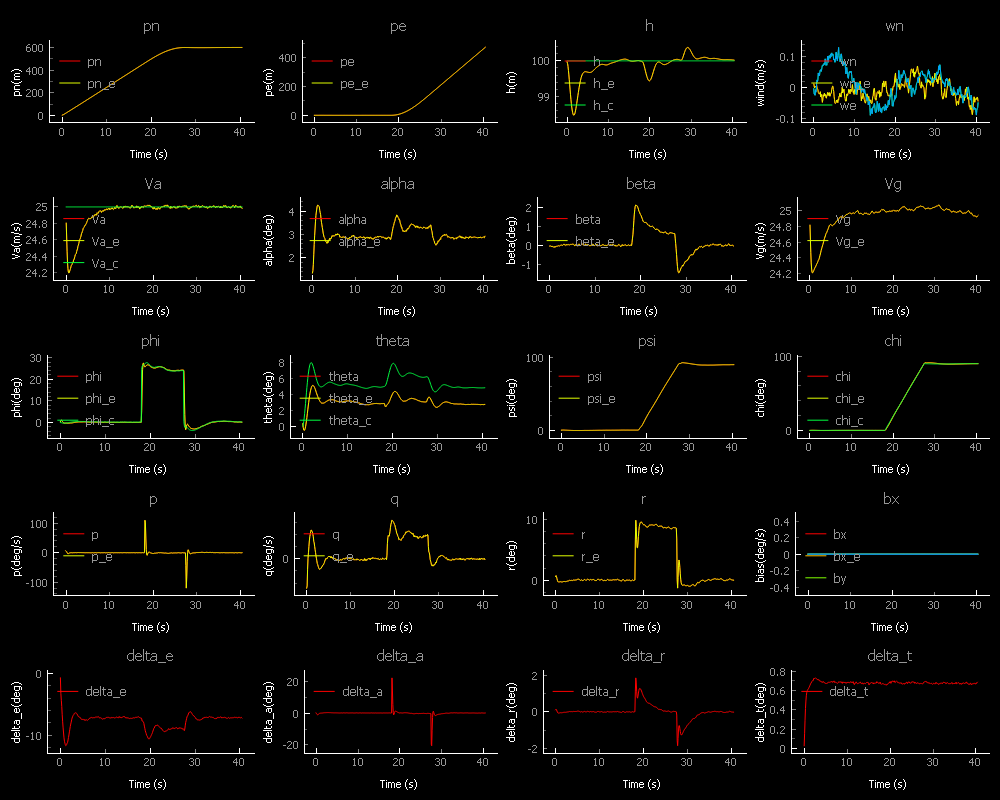

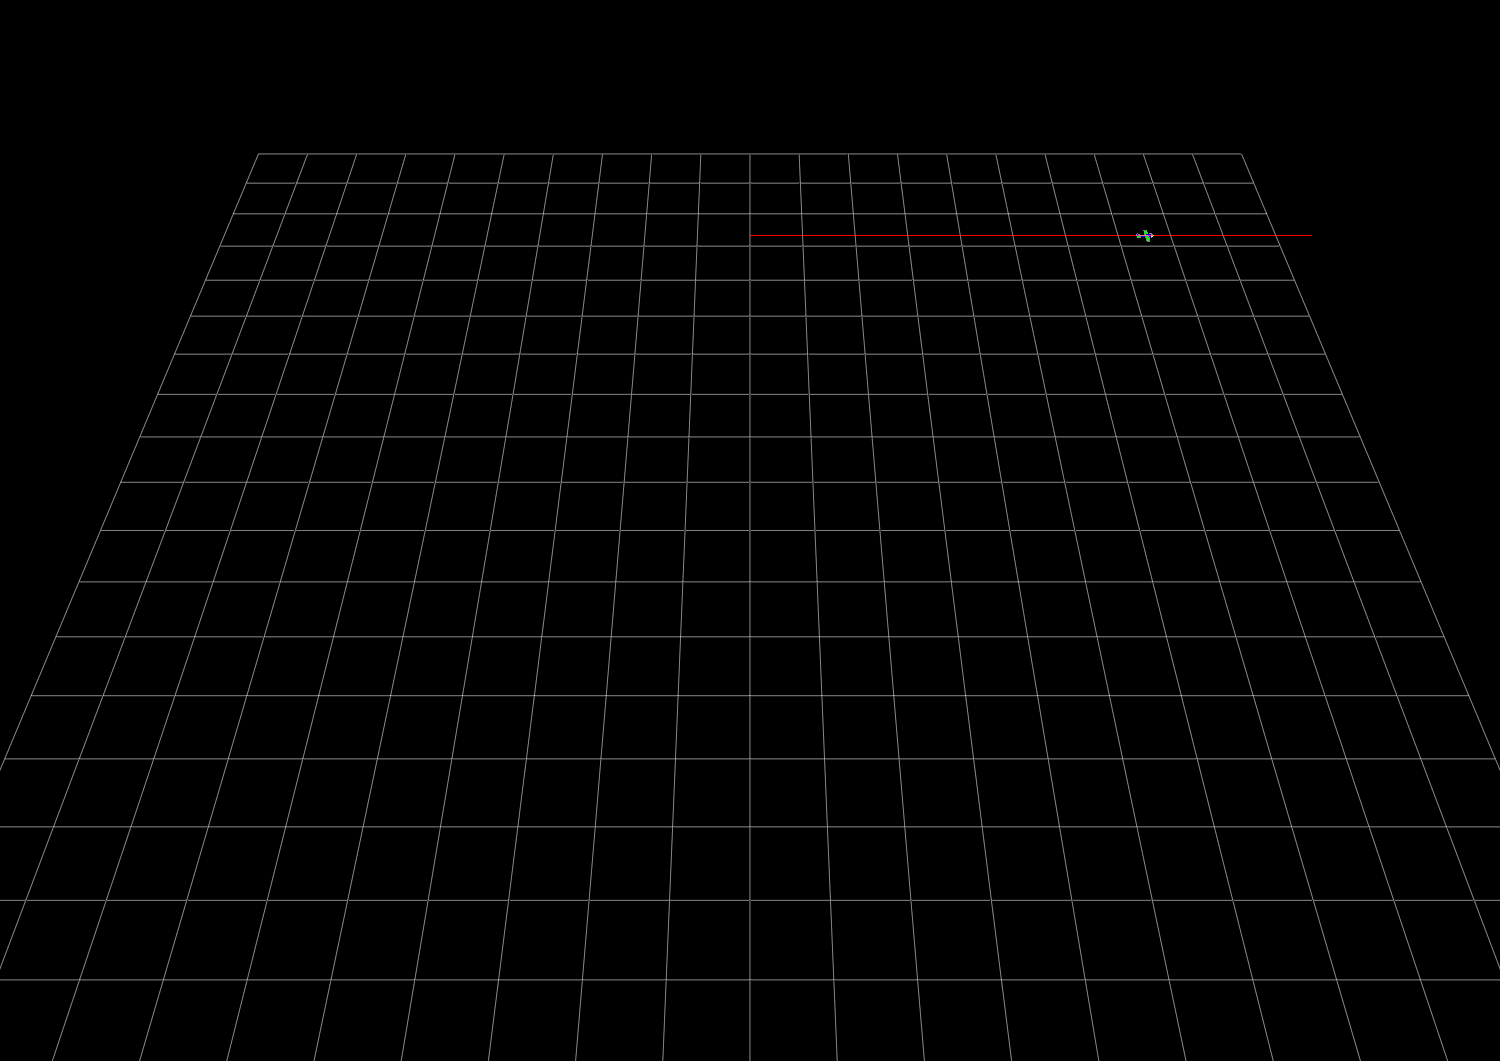

In [4]:

def constant_path(time: float, state: MsgState) -> MsgPath:
    if state.north<450 and state.east<150:
        path = MsgPath()
        path.type = "line"
        path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
        path.line_direction = np.array([[600.0,0.0,0.0]]).T
        path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
        path.airspeed=25.0
    elif state.north>=450 and state.east>=150:
        path = MsgPath()
        path.type = "line"
        path.line_origin = np.array([[600.0, 0.0, -100.0]]).T
        path.line_direction = np.array([[0.0,1.0,0.0]]).T   
        path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
        path.airspeed=25.0
    else:
        path = MsgPath()
        path.type = "orbit"
        path.orbit_center = np.array([[450, 150.0, -100.0]]).T
        path.orbit_radius = 150
        path.orbit_direction = "CW"
        path.airspeed=25.0
    return path
    # Constant path function definition

    


# Follow path
run_sim_and_display(path_fnc=constant_path)
        


## Static analysis
Run the static code analysis (you must have zero static code analysis errors to get credit). You may not modify the static code analysis configuration files.

### ISORT
Run Isort:
```
python -m isort mav_sim book_assignments
```

Terminal output (should be nothing):

### MyPy
Run MyPy
```
python -m mypy mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ mav_sim/chap10/ book_assignments
```

Terminal output (should indicate no error):
```
Success: no issues found in 43 source files
```

### Pylint
Run Pylint
```
python -m pylint --jobs 0 --rcfile .pylintrc mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ mav_sim/chap10/ book_assignments/
```

Terminal output (should indicate `10/10`)
```
Your code has been rated at 10.00/10 (previous run: 9.99/10, +0.01)
```

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!`

In [1]:
from mav_sim.unit_tests.ch10_path_follower_test import run_all_tests
run_all_tests()

Starting follow_straight_line test
End of test

Starting follow_orbit test
End of test

